In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "egypt-life-expectancy-from-2000-2020"
[2] "egypt-raw-data"

## load packages

In [2]:
install.packages("janitor")
library(janitor)
library(statsr)
install.packages("VIM")
library(VIM)
install.packages("olsrr")
library(olsrr)
install.packages("mice")
library(mice)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


************
Welcome to BayesFactor 0.9.12-4.3. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘laeken’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is m

### clean the dataset

In [3]:
full_egypt_raw = read.csv("/kaggle/input/egypt-raw-data/full_egypt_raw.csv")
head(full_egypt_raw)
egypt<-full_egypt_raw %>% 
  clean_names()
colnames(egypt)



,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,Hepatitis.B,Measles,BMI,⋯,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling,Expense....of.GDP.,Current.health.expenditure....of.GDP.,Total.employment..total..ages.15..,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Mortality.from.CVD..cancer..diabetes.or.CRD.between.exact.ages.30.and.70....,CO2.emissions..kt.
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,Egypt,2000,Developing,68.8,171,65760,0.14,98,2633,5.7,⋯,3.6,3.5,0.606,11.0,NA,4.922443,18613019,8.98,27.0,112860
2,Egypt,2001,Developing,68.6,177,62607,0.13,99,2150,51.2,⋯,3.5,3.4,0.612,11.1,NA,5.400303,18895076,9.26,28.3,125010
3,Egypt,2002,Developing,68.7,177,59911,0.14,97,653,51.8,⋯,3.4,3.4,0.617,11.2,27.24835,5.510738,19083903,10.01,28.9,127740
4,Egypt,2003,Developing,68.6,178,57601,0.14,98,164,52.3,⋯,3.3,3.3,0.621,11.3,27.33246,5.224253,19643592,11.01,29.5,131240
5,Egypt,2004,Developing,69.0,176,55698,0.14,97,80,52.9,⋯,3.3,3.2,0.623,11.2,26.89038,4.857324,20590059,10.30,29.3,142690
6,Egypt,2005,Developing,69.4,174,54251,0.15,98,77,53.5,⋯,3.2,3.2,0.629,11.4,27.38886,4.922292,21157055,11.20,29.0,160590


[1] "country"                                                               
 [2] "year"                                                                  
 [3] "status"                                                                
 [4] "life_expectancy"                                                       
 [5] "adult_mortality"                                                       
 [6] "infant_deaths"                                                         
 [7] "alcohol"                                                               
 [8] "hepatitis_b"                                                           
 [9] "measles"                                                               
[10] "bmi"                                                                   
[11] "under_five_deaths"                                                     
[12] "polio"                                                                 
[13] "total_expenditure"                                                     
[14] "diphtheria"                                                            
[15] "gdp_growth_annual"                                                     
[16] "gdp_current_us"                                                        
[17] "population_growth_annual"                                              
[18] "population_density_people_per_sq_km_of_land_area"                      
[19] "thinness_1_19_years"                                                   
[20] "thinness_5_9_years"                                                    
[21] "income_composition_of_resources"                                       
[22] "schooling"                                                             
[23] "expense_of_gdp"                                                        
[24] "current_health_expenditure_of_gdp"                                     
[25] "total_employment_total_ages_15"                                        
[26] "unemployment_total_of_total_labor_force_modeled_ilo_estimate"          
[27] "mortality_from_cvd_cancer_diabetes_or_crd_between_exact_ages_30_and_70"
[28] "co2_emissions_kt"

### null value pattern in data

,country,year,status,life_expectancy,infant_deaths,under_five_deaths,diphtheria,gdp_growth_annual,gdp_current_us,population_growth_annual,⋯,adult_mortality,bmi,polio,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,total_expenditure,expense_of_gdp,
13,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,9
2,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,11
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,15
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,17
,0,0,0,0,0,0,0,0,0,0,⋯,5,5,5,5,5,5,5,6,7,66


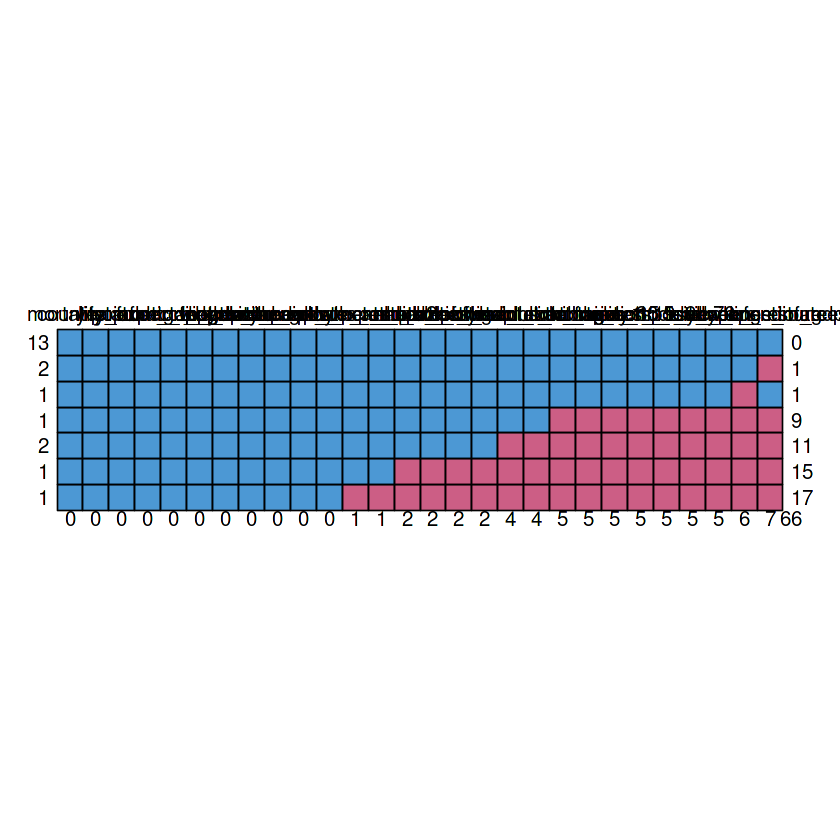


 Variables sorted by number of missings: 
                                                               Variable
                                                         expense_of_gdp
                                                      total_expenditure
                                                        adult_mortality
                                                                    bmi
                                                                  polio
                                                    thinness_1_19_years
                                                     thinness_5_9_years
                                        income_composition_of_resources
                                                              schooling
                                         total_employment_total_ages_15
           unemployment_total_of_total_labor_force_modeled_ilo_estimate
                                                                alcohol
                     

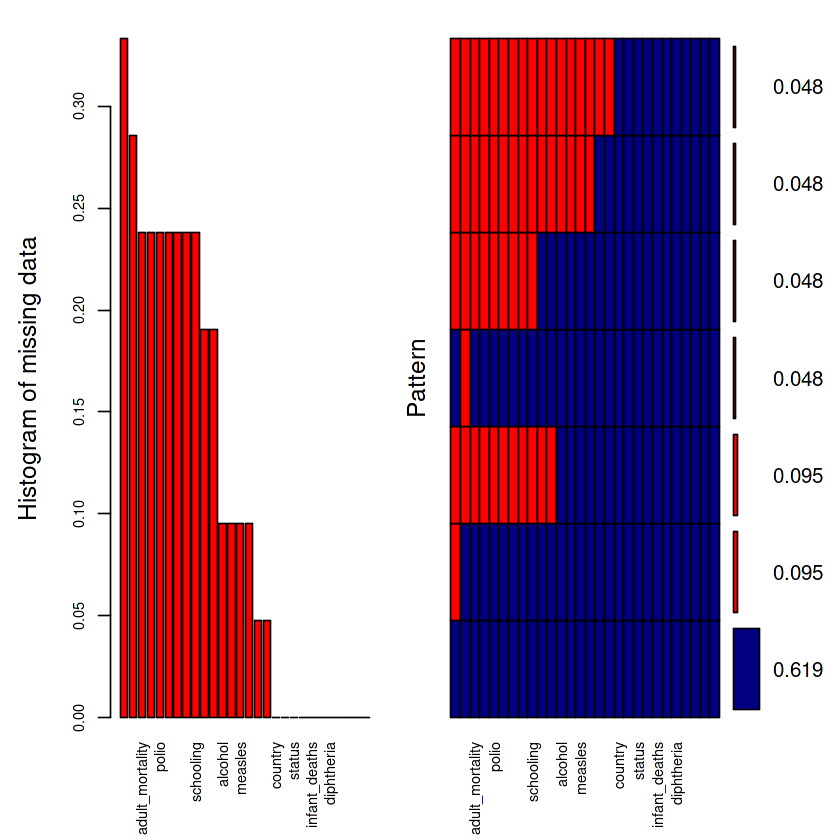

In [4]:
md.pattern(egypt)
aggr_plot <- aggr(egypt, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(egypt), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))


##  data_imputation

In [5]:
impute_data<-mice(egypt,m=5,method ="cart" )
summary(impute_data)
egypt_1<-complete(impute_data,1)



 iter imp variable
  1   1  adult_mortality  alcohol  hepatitis_b  measles  bmi  total_expenditure  thinness_1_19_years  thinness_5_9_years  income_composition_of_resources  schooling  expense_of_gdp  current_health_expenditure_of_gdp  total_employment_total_ages_15  unemployment_total_of_total_labor_force_modeled_ilo_estimate  mortality_from_cvd_cancer_diabetes_or_crd_between_exact_ages_30_and_70  co2_emissions_kt
  1   2  adult_mortality  alcohol  hepatitis_b  measles  bmi  total_expenditure  thinness_1_19_years  thinness_5_9_years  income_composition_of_resources  schooling  expense_of_gdp  current_health_expenditure_of_gdp  total_employment_total_ages_15  unemployment_total_of_total_labor_force_modeled_ilo_estimate  mortality_from_cvd_cancer_diabetes_or_crd_between_exact_ages_30_and_70  co2_emissions_kt
  1   3  adult_mortality  alcohol  hepatitis_b  measles  bmi  total_expenditure  thinness_1_19_years  thinness_5_9_years  income_composition_of_resources  schooling  expense_of_gdp

Warning message:
“Number of logged events: 483”


Class: mids
Number of multiple imputations:  5 
Imputation methods:
                                                               country 
                                                                    "" 
                                                                  year 
                                                                    "" 
                                                                status 
                                                                    "" 
                                                       life_expectancy 
                                                                    "" 
                                                       adult_mortality 
                                                                "cart" 
                                                         infant_deaths 
                                                                    "" 
                                                               alcoh

so we have a new data after imputation so we extract the data as a new data to make our model 

In [6]:
full_egypt = read.csv("/kaggle/input/egypt-life-expectancy-from-2000-2020/egypt.csv")
head(full_egypt)
  clean_names(full_egypt)


,Country,Year,Status,Life.expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,⋯,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,expense_percent_of_gdp,current_health_expenditure_percent_of_gdp,total_employment_total_ages_15,unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate,mortality_from_cvd_cancer_diabetes_or_crd_between_exact_ages_30_and_70_percent,co2_emissions_kt
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,Egypt,2000,Developing,68.8,171,65760,0.14,98,2633,5.7,⋯,3.6,3.5,0.606,11.0,29.33523,4.922443,18613019,8.98,27.0,112860
2,Egypt,2001,Developing,68.6,177,62607,0.13,99,2150,51.2,⋯,3.5,3.4,0.612,11.1,30.07713,5.400303,18895076,9.26,28.3,125010
3,Egypt,2002,Developing,68.7,177,59911,0.14,97,653,51.8,⋯,3.4,3.4,0.617,11.2,27.24835,5.510738,19083903,10.01,28.9,127740
4,Egypt,2003,Developing,68.6,178,57601,0.14,98,164,52.3,⋯,3.3,3.3,0.621,11.3,27.33246,5.224253,19643592,11.01,29.5,131240
5,Egypt,2004,Developing,69.0,176,55698,0.14,97,80,52.9,⋯,3.3,3.2,0.623,11.2,26.89038,4.857324,20590059,10.30,29.3,142690
6,Egypt,2005,Developing,69.4,174,54251,0.15,98,77,53.5,⋯,3.2,3.2,0.629,11.4,27.38886,4.922292,21157055,11.20,29.0,160590


country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,⋯,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,expense_percent_of_gdp,current_health_expenditure_percent_of_gdp,total_employment_total_ages_15,unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate,mortality_from_cvd_cancer_diabetes_or_crd_between_exact_ages_30_and_70_percent,co2_emissions_kt
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
Egypt,2000,Developing,68.8,171,65760,0.14,98,2633,5.7,⋯,3.6,3.5,0.606,11.0,29.33523,4.922443,18613019,8.98,27.0,112860
Egypt,2001,Developing,68.6,177,62607,0.13,99,2150,51.2,⋯,3.5,3.4,0.612,11.1,30.07713,5.400303,18895076,9.26,28.3,125010
Egypt,2002,Developing,68.7,177,59911,0.14,97,653,51.8,⋯,3.4,3.4,0.617,11.2,27.24835,5.510738,19083903,10.01,28.9,127740
Egypt,2003,Developing,68.6,178,57601,0.14,98,164,52.3,⋯,3.3,3.3,0.621,11.3,27.33246,5.224253,19643592,11.01,29.5,131240
Egypt,2004,Developing,69.0,176,55698,0.14,97,80,52.9,⋯,3.3,3.2,0.623,11.2,26.89038,4.857324,20590059,10.30,29.3,142690
Egypt,2005,Developing,69.4,174,54251,0.15,98,77,53.5,⋯,3.2,3.2,0.629,11.4,27.38886,4.922292,21157055,11.20,29.0,160590
Egypt,2006,Developing,69.5,175,53314,0.17,98,953,54.2,⋯,3.2,3.1,0.636,11.5,32.76367,4.841901,22034844,10.49,29.4,169130
Egypt,2007,Developing,69.7,171,52791,0.19,98,1684,54.8,⋯,3.1,3.1,0.644,11.7,29.33523,4.444932,23510594,8.80,29.1,182230
Egypt,2008,Developing,69.8,172,52693,0.21,97,668,55.5,⋯,3.1,3.0,0.651,11.9,30.31820,4.466348,24297690,8.52,29.4,189120


## create model

In [7]:
full_egypt<-full_egypt %>% 
  clean_names()
colnames(full_egypt)
model<-lm(life_expectancy~alcohol+adult_mortality+bmi+gdp_growth_annual_percent+population_growth_annual_percent
          +population_density_people_per_sq_km_of_land_area+schooling+current_health_expenditure_percent_of_gdp
          +co2_emissions_kt+unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate+total_employment_total_ages_15+hepatitis_b+income_composition_of_resources
            ,data = full_egypt )
summary(model)


[1] "country"                                                                       
 [2] "year"                                                                          
 [3] "status"                                                                        
 [4] "life_expectancy"                                                               
 [5] "adult_mortality"                                                               
 [6] "infant_deaths"                                                                 
 [7] "alcohol"                                                                       
 [8] "hepatitis_b"                                                                   
 [9] "measles"                                                                       
[10] "bmi"                                                                           
[11] "under_five_deaths"                                                             
[12] "total_expenditure"                                                             
[13] "diphtheria"                                                                    
[14] "gdp_growth_annual_percent"                                                     
[15] "gdp_current_us"                                                                
[16] "population_growth_annual_percent"                                              
[17] "population_density_people_per_sq_km_of_land_area"                              
[18] "thinness_1_19_years"                                                           
[19] "thinness_5_9_years"                                                            
[20] "income_composition_of_resources"                                               
[21] "schooling"                                                                     
[22] "expense_percent_of_gdp"                                                        
[23] "current_health_expenditure_percent_of_gdp"                                     
[24] "total_employment_total_ages_15"                                                
[25] "unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate"          
[26] "mortality_from_cvd_cancer_diabetes_or_crd_between_exact_ages_30_and_70_percent"
[27] "co2_emissions_kt"


Call:
lm(formula = life_expectancy ~ alcohol + adult_mortality + bmi + 
    gdp_growth_annual_percent + population_growth_annual_percent + 
    population_density_people_per_sq_km_of_land_area + schooling + 
    current_health_expenditure_percent_of_gdp + co2_emissions_kt + 
    unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate + 
    total_employment_total_ages_15 + hepatitis_b + income_composition_of_resources, 
    data = full_egypt)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.177434 -0.045400 -0.003665  0.039382  0.179376 

Coefficients:
                                                                       Estimate
(Intercept)                                                           6.961e+01
alcohol                                                               1.021e+00
adult_mortality                                                      -2.782e-02
bmi                                                                  -2.452e-03
gdp_growth

## select the most factor that affect on life_expectancy with AIC method

In [8]:
step(model,direction = "backward")


Start:  AIC=-78.45
life_expectancy ~ alcohol + adult_mortality + bmi + gdp_growth_annual_percent + 
    population_growth_annual_percent + population_density_people_per_sq_km_of_land_area + 
    schooling + current_health_expenditure_percent_of_gdp + co2_emissions_kt + 
    unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate + 
    total_employment_total_ages_15 + hepatitis_b + income_composition_of_resources

                                                                       Df
- co2_emissions_kt                                                      1
- income_composition_of_resources                                       1
- unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate  1
- hepatitis_b                                                           1
- alcohol                                                               1
- gdp_growth_annual_percent                                             1
- population_growth_annual_percent                 


Call:
lm(formula = life_expectancy ~ adult_mortality + bmi + population_density_people_per_sq_km_of_land_area + 
    schooling + total_employment_total_ages_15, data = full_egypt)

Coefficients:
                                     (Intercept)  
                                       6.858e+01  
                                 adult_mortality  
                                      -2.933e-02  
                                             bmi  
                                      -2.555e-03  
population_density_people_per_sq_km_of_land_area  
                                       8.584e-02  
                                       schooling  
                                      -2.279e-01  
                  total_employment_total_ages_15  
                                       9.474e-08  


## so in this model we find the most factor that directly affect on life expectancy :  
1- adult_mortality 
2- bmi
3-population_density_people_per_sq_km_of_land_area 
4-schooling
5-total_employment_total_ages_15

## and now we move to the indirect factor that affect the life_expectancy

 ### 1-population and gdp 


Call:
lm(formula = gdp_growth_annual_percent ~ population_growth_annual_percent)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5240 -1.1068  0.1475  1.2622  1.7337 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        15.600      3.585   4.351 0.000344 ***
population_growth_annual_percent   -5.680      1.804  -3.148 0.005294 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.358 on 19 degrees of freedom
Multiple R-squared:  0.3428,	Adjusted R-squared:  0.3082 
F-statistic: 9.911 on 1 and 19 DF,  p-value: 0.005294


`geom_smooth()` using formula 'y ~ x'



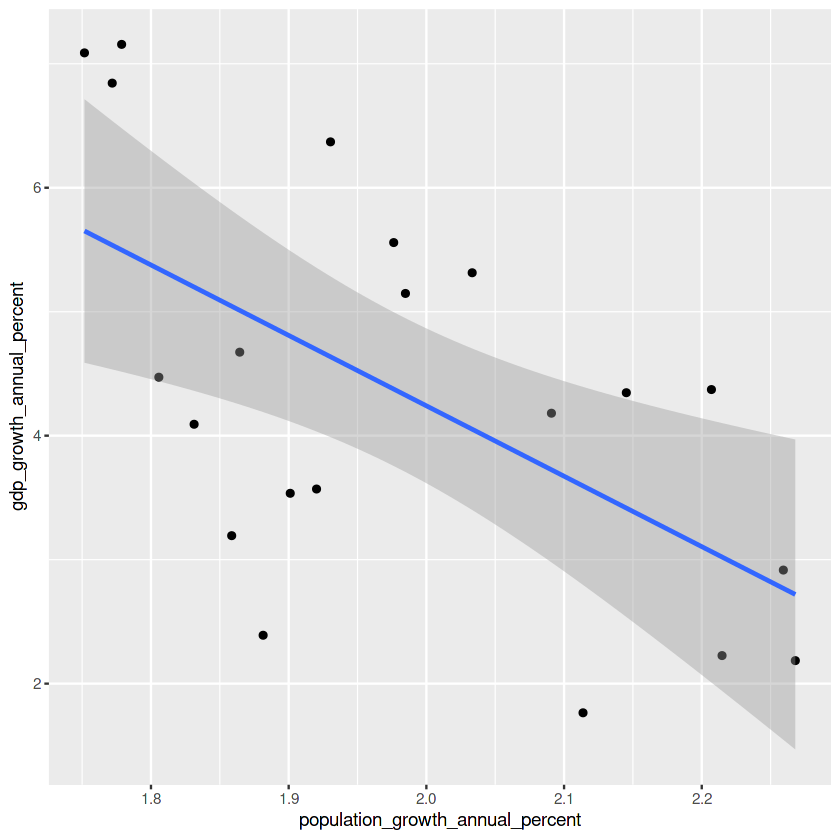

In [9]:
attach(full_egypt)

model_2<-lm(gdp_growth_annual_percent~population_growth_annual_percent)
summary(model_2)
full_egypt %>% 
  ggplot(mapping = aes(x=population_growth_annual_percent,y=gdp_growth_annual_percent))+
  geom_point()+
  geom_smooth(method = "lm")


so in this figure we saw a negative correlation between population and gdp 
each unit increase in population decrease the gdp by 5.7 which lead to decrease the life_expectancy 


## 2- unemployment and gdp growth

new("standardGeneric", .Data = function (object, ...) 
standardGeneric("summary"), generic = "summary", package = "base", 
    group = list(), valueClass = character(0), signature = "object", 
    default = new("derivedDefaultMethod", .Data = function (object, 
        ...) 
    UseMethod("summary"), target = new("signature", .Data = "ANY", 
        names = "object", package = "methods"), defined = new("signature", 
        .Data = "ANY", names = "object", package = "methods"), 
        generic = "summary"), skeleton = (new("derivedDefaultMethod", 
        .Data = function (object, ...) 
        UseMethod("summary"), target = new("signature", .Data = "ANY", 
            names = "object", package = "methods"), defined = new("signature", 
            .Data = "ANY", names = "object", package = "methods"), 
        generic = "summary"))(object, ...))
<environment: 0x558b9586d6a0>
attr(,"generic")
[1] "summary"
attr(,"generic")attr(,"package")
[1] "base"
attr(,"package")
[1] "base"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "object"
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (object, ...) 
UseMethod("summary")
<bytecode: 0x558b953943f0>
<environment: namespace:base>

Signatures:
        object
target  "ANY" 
defined "ANY" 
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (object, ...) 
UseMethod("summary"), target = new("signature", .Data = "ANY", 
    names = "object", package = "methods"), defined = new("signature", 
    .Data = "ANY", names = "object", package = "methods"), generic = "summary"))(object, 
    ...)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

`geom_smooth()` using formula 'y ~ x'



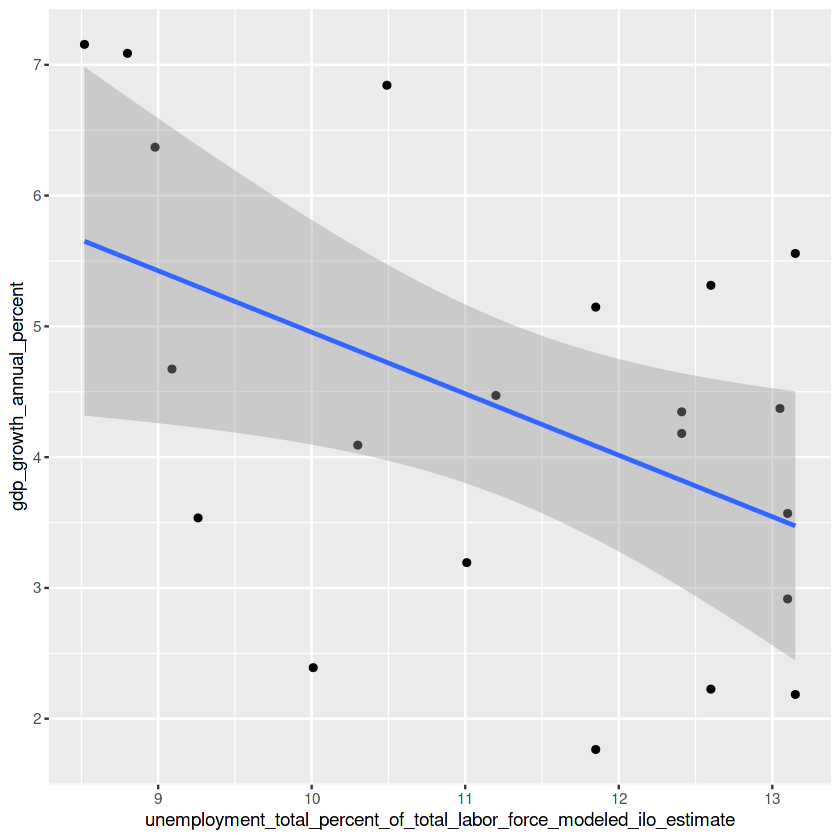

In [10]:
model_3<-lm(gdp_growth_annual_percent~unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate)
summary
full_egypt %>% 
  ggplot(mapping = aes(x=unemployment_total_percent_of_total_labor_force_modeled_ilo_estimate,y=gdp_growth_annual_percent))+
  geom_point()+
  geom_smooth(method = "lm")


## 3- adult mortality and hepatitis_b


Call:
lm(formula = adult_mortality ~ hepatitis_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1809  -1.8442   0.8191   2.3769   5.8191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -98.3719    47.4629  -2.073   0.0521 .  
hepatitis_b   2.7789     0.4938   5.627    2e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.3 on 19 degrees of freedom
Multiple R-squared:  0.625,	Adjusted R-squared:  0.6053 
F-statistic: 31.67 on 1 and 19 DF,  p-value: 1.997e-05


`geom_smooth()` using formula 'y ~ x'



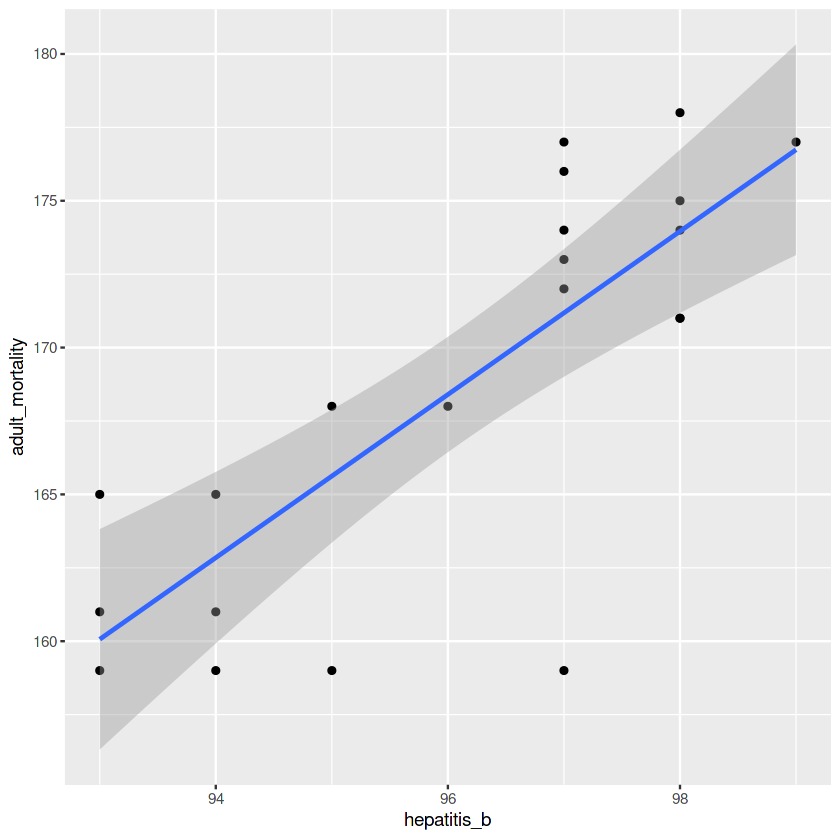

In [11]:
model_4<-lm(adult_mortality~hepatitis_b)
summary(model_4)
full_egypt %>% 
  ggplot(mapping = aes(x=hepatitis_b,y=adult_mortality))+
  geom_point()+
  geom_smooth(method = "lm")


## 4-co2 emissions and population density



Call:
lm(formula = co2_emissions_kt ~ population_density_people_per_sq_km_of_land_area)

Residuals:
   Min     1Q Median     3Q    Max 
-55391 -16529  10890  14894  19170 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                      -81392.3    40010.7  -2.034
population_density_people_per_sq_km_of_land_area   3163.3      470.2   6.728
                                                 Pr(>|t|)    
(Intercept)                                        0.0561 .  
population_density_people_per_sq_km_of_land_area 1.98e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22150 on 19 degrees of freedom
Multiple R-squared:  0.7044,	Adjusted R-squared:  0.6888 
F-statistic: 45.27 on 1 and 19 DF,  p-value: 1.981e-06


`geom_smooth()` using formula 'y ~ x'



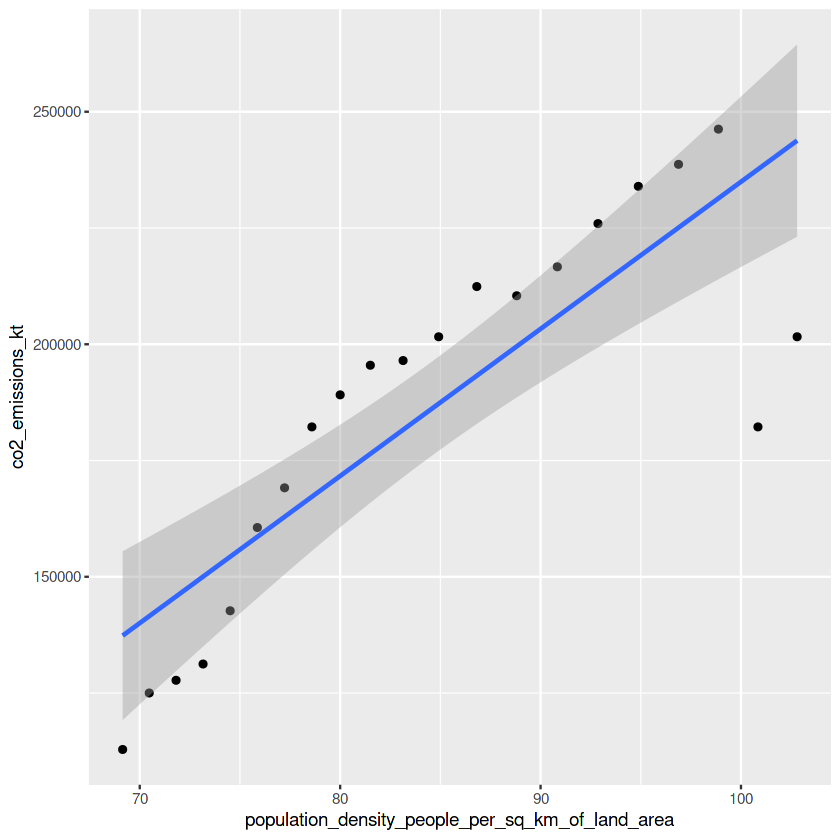

In [12]:
model_5<-lm(co2_emissions_kt~population_density_people_per_sq_km_of_land_area)
summary(model_5)
full_egypt %>% 
  ggplot(mapping = aes(x=population_density_people_per_sq_km_of_land_area,y=co2_emissions_kt))+
  geom_point()+
  geom_smooth(method = "lm")
